<a href="https://colab.research.google.com/github/VivanBhatt/QuantumAlg_HW/blob/main/PHSX801_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pennylane --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.7 MB/s eta 0:00:00


In [2]:
import pennylane as qml
import numpy as np
#import matplotlib.pyplot as plt

**No Exponential Magic**

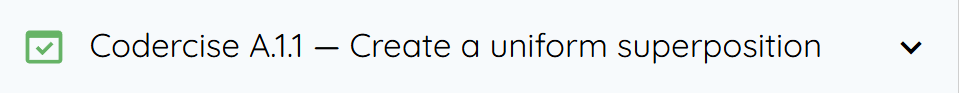

**Q1**

In [3]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def naive_circuit():
    """Create a uniform superposition and return the probabilities.

    Returns:
        array[float]: Probabilities for observing different outcomes.
    """
    for wire in range(n_bits):

        ##################
        # YOUR CODE HERE #
        ##################

        qml.Hadamard(wire)

    return qml.probs(wires=range(n_bits))

**The Magic 8-Ball**

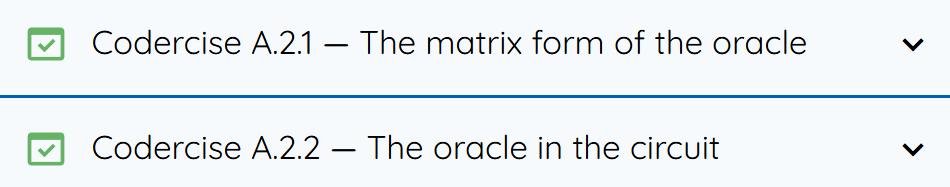

**Q1**

In [4]:
def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix

    ##################
    # YOUR CODE HERE #
    ##################

    # MODIFY DIAGONAL ENTRY CORRESPONDING TO SOLUTION INDEX

    my_array[index,index]=-1

    return my_array

**Q2**

In [5]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def oracle_circuit(combo):
    """Create a uniform superposition, apply the oracle, and return probabilities.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: The output probabilities.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    for wire in range(n_bits):
        qml.Hadamard(wire)


    qml.QubitUnitary(oracle_matrix(combo),wires=range(n_bits))

    return qml.probs(wires=range(n_bits))

**Pair Programming**

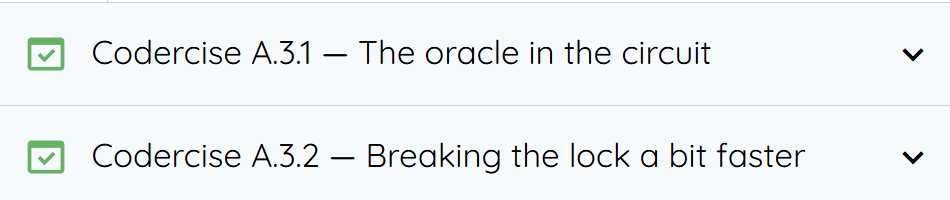

**Q1**

In [6]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def pair_circuit(x_tilde, combo):
    """Test a pair labelled by x_tilde for the presence of a solution.

    Args:
        x_tilde (list[int]): An (n_bits - 1)-string labelling the pair to test.
        combo (list[int]): A secret combination of n_bits 0s and 1s.

    Returns:
        array[float]: Probabilities on the last qubit.
    """
    for i in range(n_bits-1): # Initialize x_tilde part of state
        if x_tilde[i] == 1:
            qml.PauliX(wires=i)

    ##################
    # YOUR CODE HERE #
    ##################

    qml.Hadamard(n_bits-1)
    qml.QubitUnitary(oracle_matrix(combo),range(n_bits))
    qml.Hadamard(n_bits-1)

    return qml.probs(wires=n_bits-1)

**Q2**

In [8]:
def secret_combo(n_bits):
    """Generate a random list of n_bits 0s and 1s."""
    return np.random.randint(0, 2, size=n_bits)

def pair_lock_picker(trials):
    """Create a combo, run pair_circuit until it succeeds, and tally success rate.

    Args:
        trials (int): Number of times to test the lock picker.

    Returns:
        float: The average number of times the lock picker uses pair_circuit.
    """
    x_tilde_strs = [np.binary_repr(n, n_bits-1) for n in range(2**(n_bits-1))]
    x_tildes = [[int(s) for s in x_tilde_str] for x_tilde_str in x_tilde_strs]

    test_numbers = []

    for trial in range(trials):
        combo = secret_combo(n_bits) # Random list of bits
        counter = 0
        for x_tilde in x_tildes:
            counter += 1

            ##################
            # YOUR CODE HERE #
            ##################

            if np.isclose(pair_circuit(x_tilde,combo)[1],1.0):  # Fill-in logic
                break

        test_numbers.append(counter)
    return sum(test_numbers)/trials

trials = 500
output = pair_lock_picker(trials)

print(f"For {n_bits} bits, it takes", output, "pair tests on average.")

For 4 bits, it takes 4.444 pair tests on average.


**Making and Breaking Promises**

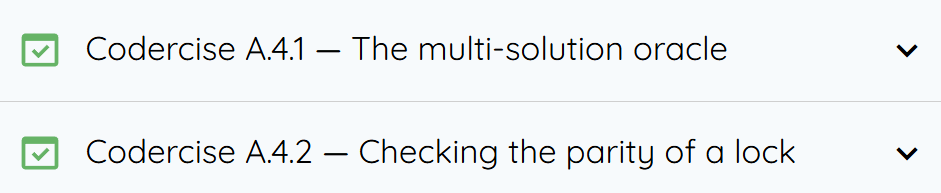

**Q1**

In [9]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

def multisol_oracle_matrix(combos):
    """Return the oracle matrix for a set of solutions.

    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    indices = [np.ravel_multi_index(combo, [2]*len(combo)) for combo in combos]
    my_array = np.identity(2**len(combos[0])) # Create the identity matrix
    for index in indices:
        my_array[index,index]=-1

    ##################
    # YOUR CODE HERE #
    ##################
    return my_array

@qml.qnode(dev)
def multisol_pair_circuit(x_tilde, combos):
    """Implements the circuit for testing a pair of combinations labelled by x_tilde.

    Args:
        x_tilde (list[int]): An (n_bits - 1)-bit string labelling the pair to test.
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: Probabilities on the last qubit.
    """
    for i in range(n_bits-1): # Initialize x_tilde part of state
        if x_tilde[i] == 1:
            qml.PauliX(wires=i)

    qml.Hadamard(n_bits-1)
    qml.QubitUnitary(multisol_oracle_matrix(combos),range(n_bits))
    qml.Hadamard(n_bits-1)

    ##################
    # YOUR CODE HERE #
    ##################

    return qml.probs(wires=n_bits-1)

**Q2**

In [10]:
def parity_checker(combos):
    """Use multisol_pair_circuit to determine the parity of a solution set.

    Args:
        combos (list[list[int]]): A list of secret combinations.

    Returns:
        int: The parity of the solution set.
    """
    parity = 0
    x_tilde_strs = [np.binary_repr(n, n_bits-1) for n in range(2**(n_bits-1))]
    x_tildes = [[int(s) for s in x_tilde_str] for x_tilde_str in x_tilde_strs]
    for x_tilde in x_tildes:
        if np.isclose(multisol_pair_circuit(x_tilde,combos)[1],1.0):
            parity+=1

        ##################
        # YOUR CODE HERE #
        ##################

        # IMPLEMENT PARITY COUNTING ALGORITHM

    return parity%2

**Hadamard Transform**

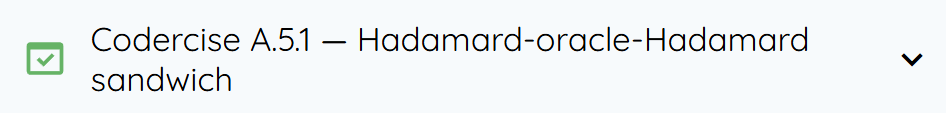

**Q1**

In [11]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def hoh_circuit(combo):
    """A circuit which applies Hadamard-oracle-Hadamard and returns probabilities.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: Measurement outcome probabilities.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    for wire in range(n_bits):
        qml.Hadamard(wire)
    qml.QubitUnitary(oracle_matrix(combo),wires=range(n_bits))
    for wire in range(n_bits):
        qml.Hadamard(wire)

    return qml.probs(wires=range(n_bits))

**Deutsch-Jozsa**

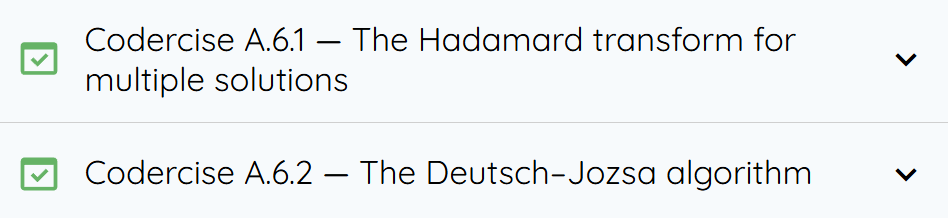

**Q1**

In [12]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def multisol_hoh_circuit(combos):
    """A circuit which applies Hadamard, multi-solution oracle, then Hadamard.

    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: Probabilities for observing different outcomes.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    for wire in range(n_bits):
        qml.Hadamard(wire)
    qml.QubitUnitary(multisol_oracle_matrix(combos),wires=range(n_bits))
    for wire in range(n_bits):
        qml.Hadamard(wire)

    return qml.probs(wires=range(n_bits))

**Q2**

In [22]:
from itertools import combinations

def multisol_combo(n_bits, how_many):
    """Generate a list of random bit strings.

    Args:
        n_bits (int): The number of bits in each string.
        how_many (int): The number of strings to generate.

    Returns:
        list[list[int]]: A list of random bit strings.
    """

    combos = []
    for i in range(how_many):
        combo = [np.random.randint(0, 2) for _ in range(n_bits)]
        combos.append(combo)

    return combos

def deutsch_jozsa(promise_var):
    """Implement the Deutsch–Jozsa algorithm and guess the promise variable.

    Args:
        promise_var (int): Indicates whether the function is balanced (0) or constant (1).

    Returns:
        int: A guess at the promise variable.
    """
    if promise_var == 0:
        how_many = 2**(n_bits - 1)
    else:
        how_many = np.random.choice([1, 2**n_bits]) # Choose all or nothing randomly
    combos = multisol_combo(n_bits, how_many) # Generate random combinations

    ##################
    # YOUR CODE HERE #
    ##################

    result = multisol_hoh_circuit(combos)

    if np.isclose(result[0], 1):
        return 1
    else:
        return 0

print(deutsch_jozsa(0))
print(deutsch_jozsa(1))

0
0


In [43]:
def deutsch_jozsa(promise_var):
    """Implements the Deutsch–Jozsa algorithm and guesses the promise variable.

    Args:
        promise_var (int): Indicates whether the function is balanced (0) or constant (1).

    Returns:
        int: A guess at the promise variable.
    """
    if promise_var == 0:
        how_many = 2**(n_bits - 1)
    else:
        how_many = np.random.choice([1, 2**n_bits]) # Choose all or nothing randomly
    combos = multisol_combo(n_bits, how_many) # Generate random combinations
    zero_prob = multisol_hoh_circuit(combos)[0] # Probability of observing the all-zero state
    guess = int(np.rint(zero_prob)) # Round to nearest integer
    return guess

print(deutsch_jozsa(0))
print(deutsch_jozsa(1))

0
1
